In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# VARIABILI
csvfile = 'csv/alldata.csv'
distance_param = 'CDistance'

# LETTURA DATI
tragitti = pd.read_csv(csvfile, index_col=False)

# PULIZIA DATI
pre_lock_cond = (tragitti['Month'] == 3) & (tragitti['Day'] < 13)
post_lock_cond = ((tragitti['Month'] == 5) & (tragitti['Day'] >= 4)) | (tragitti['Month'] > 5)

def clean(df):
    distance_cond = df[distance_param] > 0
    moovit_cond = df['Public'] > 12
    public_cond = df['Public'] > 0
    bike_cond = df['Bike'] > 0
    foot_cond = df['Foot'] > 0
    car_cond = df['Car'] > 0
    car2go_cond = df['Car2Go'] > 0
    enjoy_cond = df['Enjoy'] > 0
    coherence_cond = (df['Car'] <= df['Car2Go']) & (df['Car'] <= df['Enjoy'])
    cleaned = distance_cond & public_cond & bike_cond & foot_cond & car_cond & car2go_cond & enjoy_cond & coherence_cond
    return cleaned

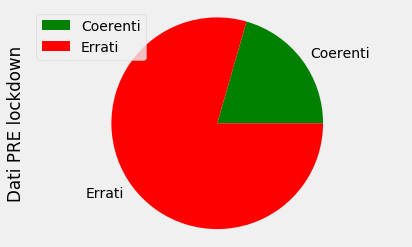

In [2]:
tragitti_pre_lock = tragitti[pre_lock_cond]
filter_clean = clean(tragitti_pre_lock)
resume = pd.DataFrame([len(tragitti_pre_lock[filter_clean]), len(tragitti_pre_lock) - len(tragitti_pre_lock[filter_clean])], index=['Coerenti', 'Errati'], columns=['Dati PRE lockdown'])
resume.plot.pie('Dati PRE lockdown', colors=['green', 'red'])
plt.axis('equal')
plt.show()

In [3]:
resume.insert(1, "%", (resume['Dati PRE lockdown'] / len(tragitti_pre_lock)).apply(lambda p: np.round(p, 3) * 100))
resume

,Dati PRE lockdown,%
Coerenti,1988,20.5
Errati,7692,79.5


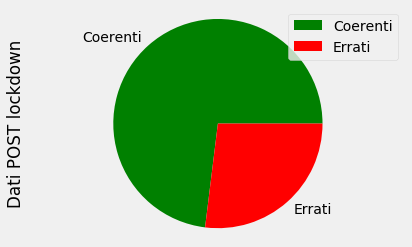

In [4]:
tragitti_post_lock = tragitti[post_lock_cond]
filter_clean = clean(tragitti_post_lock)
resume = pd.DataFrame([len(tragitti_post_lock[filter_clean]), len(tragitti_post_lock) - len(tragitti_post_lock[filter_clean])], index=['Coerenti', 'Errati'], columns=['Dati POST lockdown'])
resume.plot.pie('Dati POST lockdown', colors=['green', 'red'])
plt.axis('equal')
plt.show()

In [5]:
resume.insert(1, "%", (resume['Dati POST lockdown'] / len(tragitti_post_lock)).apply(lambda p: np.round(p, 3) * 100))
resume

,Dati POST lockdown,%
Coerenti,49560,73.0
Errati,18290,27.0
